In [10]:
import cv2
PATH = './data/girl.jpg'

In [11]:
colored_img = cv2.imread(PATH)
gray_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)

In [13]:
adaptive = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
cv2.imwrite('./data/text_adaptive.jpg', adaptive)

True

In [14]:
_, otsu = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('./data/text_otsu.jpg', otsu)

True

In [15]:
simple = gray_img.copy()
simple[simple > 127] = 255
simple[simple <= 127] = 0
cv2.imwrite('./data/text_simple.jpg', simple)

True

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)


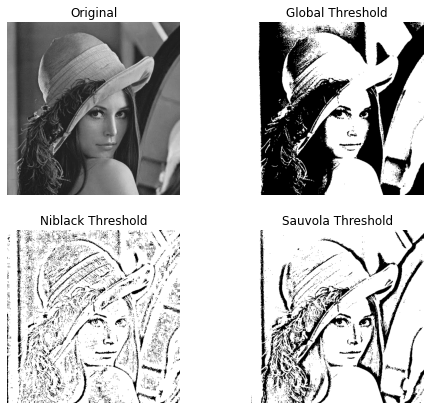

In [14]:

image = np.array(gray_img)
binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()